<a href="https://colab.research.google.com/github/akashnarwal7/Califlornia-Housing-Price-Prediction-Model/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Load files from drive to google colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem Statement :



*   you will be given districts and their features and district median house price value .

*   you will be given new district and their features .
*   Based on learning how districts house value depend on features we need to predict the house price value for the new District.




Steps After Kowing Problem or Framing Problem.

*   Think SuperVised or UnsuperVised  ?
            Supervised learning
*   Think Offline or Online Learning  ?
            Offline learning


*   Think of the Algorithim or Model Type ?
       Multiple linear Regression
*   Think of Performance Measure  ? Mean Absolute Error (MAE)






# Mean Absolute Error

MAE(x,h) =(1/m)*(summation of (predicted value - actual value) for all samples)

In [5]:
#Load a Dataset.

import numpy as np
import pandas as pd

housing=pd.read_csv("/content/drive/MyDrive/HousingPricePrediction_project/housing.csv")
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Identifying Missing Values

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Solution to this Missing values is Generally Placing Median or average values in that place. and this is a choice.this is not a necessary or compulsory we can use it if it works.

we can Now fill missing values using a function which takes given Data and return the changed Data.

But Doing so we need to call everytime this function. so Instead of that we
Sckit learn lets us create a pipeline.


*   But Doing so we need to call everytime this function. so Instead of that we Sckit learn lets us create a pipeline.

*  In that pipeline we define sequence of Transformations that can happen.


*  so everytime we call that transformer it takes Data and calls all Data Transforming Functions for you in given sequence.letting you avoid call 100 functions in the same sequence .






We will not create pipeline now .we will create it later until we are not going to perform any Data Transformation.

# Categorical Attribute



*   we can observe from earlier output that all are numerical attribute except the last one. That can be a Text Attribute or Catagerical Attribute.

*  So we are going to find that if all values in the attribute are different then it is a text attribute.

*  if the unique values are only few or less then it is a categorical attribute.

In [7]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


. Whatever it is either categorical attribute or text attribute  we should perform text representation.

. i.e converting data into numbers so that mathematical functions(Model) can work on that Data.is called text representation.

. simply converting text into numbers.

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


. Total_rooms is a fearure we can see here .This is for a district.This is not so much Informative May be we can make it more informative by calculating
total_rooms per household,

*   same way total_bedrooms per house hold.

*   same way population also per household.

*   same way  we can try median_income income per household(This is not given in book this is my choice) so we create two models we will have this feature and in other we won't have it.

# we will build two models and try out which feature combination works better.

# Model1
     . Total rooms, Bedrooms per house hold

     . population also per household

# Model2
     . Total rooms, Bedrooms per house hold

     . population also per household

     . median_income income per household

# RE VISIT

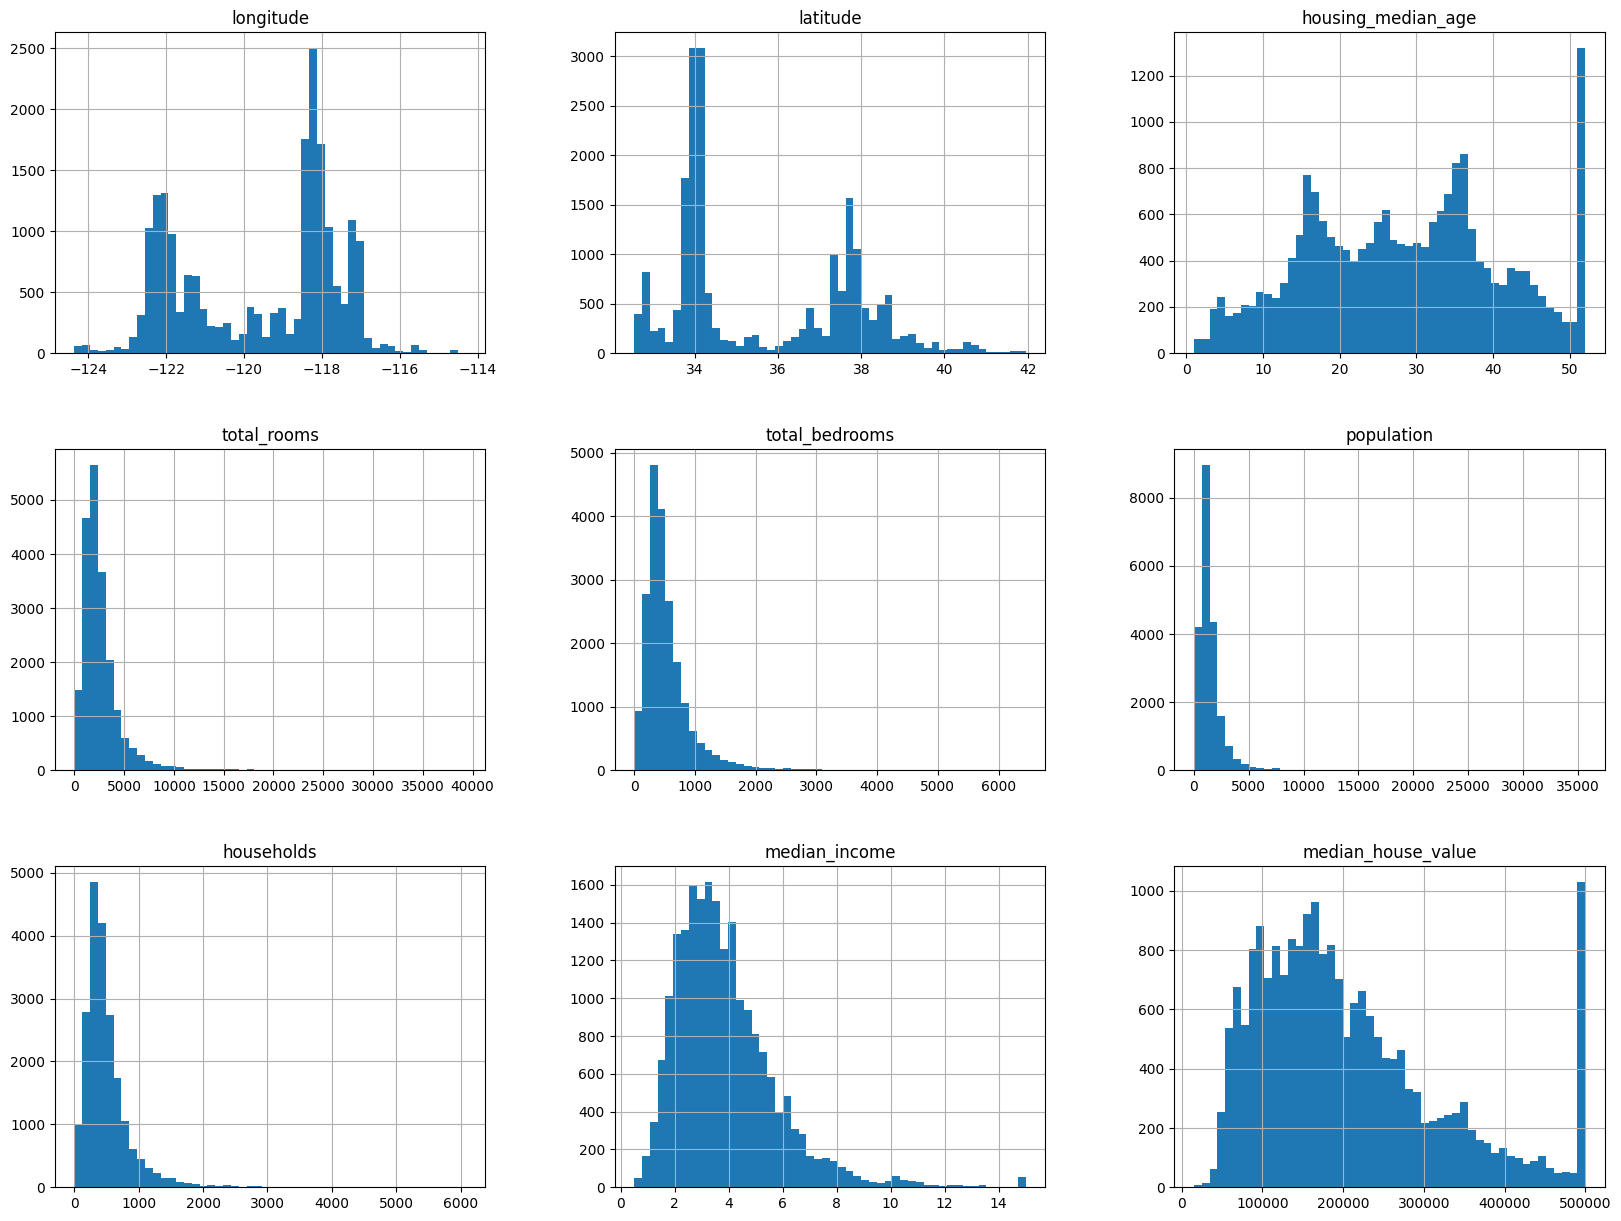

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Split Test set

# RE VISIT

In [10]:
# We are going to perform test split
# we are going to perform stratified test split.
# what is stratified split : it means divide the data into categories based on the most correlated feature
# these categories are called as bins.
# we should ensure same % of each bin or category should be present in both training and test set. i.e Uniform Distribution.



# now the first task is to find the most co-related feature with the target feature.




# En-coding Non-Numerical Data

In [11]:
housing_copy=housing.copy()
housing_copy.head()
housing_copy.at[0,'latitude']=100.00
housing.head()
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,100.00,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
# so everytime we make some manipulation in data we should make a copy of it and make those changes on it.

housing_cp=housing.copy()
housing_cp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat=housing_cp[['ocean_proximity']]
housing_cat_1_hot=encoder.fit_transform(housing_cat)
housing_cat_1_hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [15]:
housing_cat_1_hot_arr=housing_cat_1_hot.toarray()
housing_cat_1_hot_arr

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Convert the encoded Array into a DataFrame

In [16]:
housing_cat_1_hot_df=pd.DataFrame(housing_cat_1_hot_arr, columns=encoder.get_feature_names_out(['ocean_proximity']))
housing_cat_1_hot_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


#  Do the changes in copy not in original Dataset
 Drop the categorical attribute and replace with encoded column

In [17]:
housing_copy.drop('ocean_proximity',axis=1,inplace=True)
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,100.00,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
housing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Replace with encoded data
# concatenate encoded Data Frame

In [20]:
housing_copy=pd.concat([housing_copy,housing_cat_1_hot_df],axis=1)
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,100.00,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [21]:
#before doing this we need to encode all non-numerical data.
housing_copy.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.906824,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.906824,1.000000,0.012289,-0.036442,-0.066896,-0.107814,-0.070872,-0.074878,-0.138156,-0.438689,0.342755,-0.016241,0.355042,-0.157927
housing_median_age,-0.108197,0.012289,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036442,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066896,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.107814,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.070872,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.074878,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.138156,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.438689,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


# let us know the most co-related feature for the output feature or target.

In [22]:
corr_matrix=housing_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_<1H OCEAN,0.256617
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023416


# so ,we can clearly see that median_income is the most co-related feature.

<Axes: >

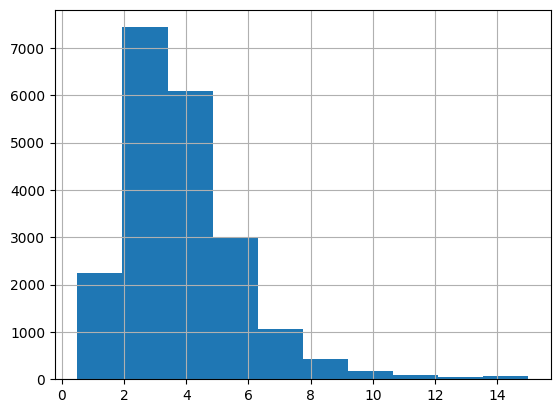

In [23]:
# so now we need to create the bins
housing_copy['median_income'].hist()

RE VISIT (Machine Learning Design Patterns)

Now we are going to create strata or categories or bins

i.e data is to be seperated based on income.

there are going to be five categories labeled 1 to 5

1 -> income from 0 to 1.5

2 -> income from 1.5 to 3

3 -> income from 3 to 4.5

4 -> income from 4.5 to 6

5 -> income from 6 to inf

In [24]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

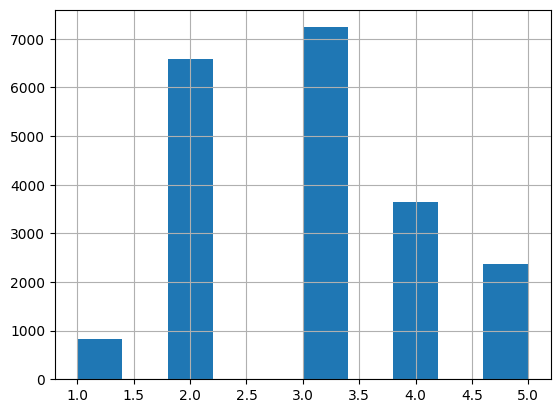

In [25]:
# let us see how train Data is distributed.

housing['income_cat'].hist()

# Let us split Train and Test

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# split(x,y) where y is the all values of income feature
# x is dataset
# it ensures both train _Split and test_split conatins same proportions of categories as it is in original Data.
# original Data ,Train and test all contains same proportions of Data.
splittedIndices=split.split(housing,housing['income_cat'])
# splittedIndices[i][0]
# SplttedIndices[i][1]
for train_index,test_index in splittedIndices:
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

#Now the train set is strat Train set

#Now the test set is start test set

train_set=strat_train_set.copy()
test_set=strat_test_set.copy()



# Train set Distribution

<Axes: >

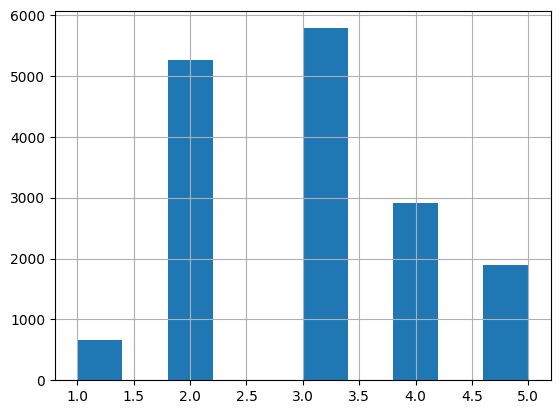

In [27]:
train_set['income_cat'].hist()

# Test set Distribution

<Axes: >

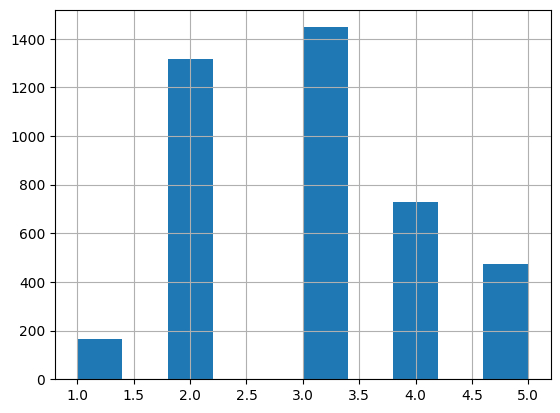

In [28]:
test_set['income_cat'].hist()

# Original Data Distribution

<Axes: >

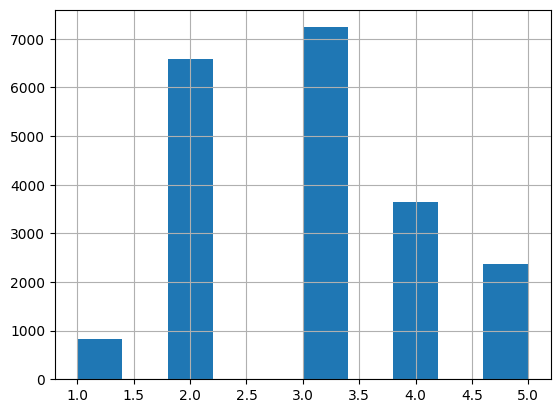

In [29]:
housing['income_cat'].hist()

## From the 3 distributions we can see all proportions are same.
## i.e all income categories are in same percentage in all 3 train ,test and original Data

# How to Do this in the case when we add or insert new data into exisiting Data.

# we should split test and train again when we re-train
Ensuring no Data Leakage occurs.
 i.e no test Samples goes to Train

# Lets drop the Income_cat attribute from both train and test.

In [30]:
# now lets drop income_cat attribute from train and test.

train_set=train_set.drop("income_cat",axis=1)
test_set=test_set.drop("income_cat",axis=1)

In [31]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [32]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


# Next step is to visualize the Data
# RE VISIT

<Axes: xlabel='longitude', ylabel='latitude'>

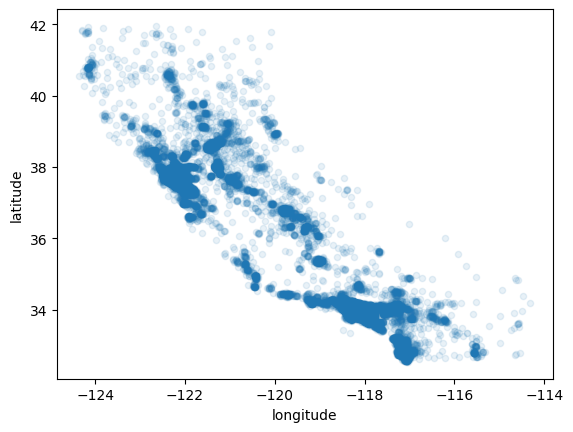

In [33]:
housing_=strat_train_set.copy()
housing_.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

In the earlier Graph what we can understand

1. Dense areas represent more districts are present.


*   but the population of District ?

*   How expensive house prices are in that district ?

 That is which locations or regions has high house , lower prices

 also which regions has higher , lower population       



# Improvised Graph Visualization for visualizing  location graph.

<Axes: xlabel='longitude', ylabel='latitude'>

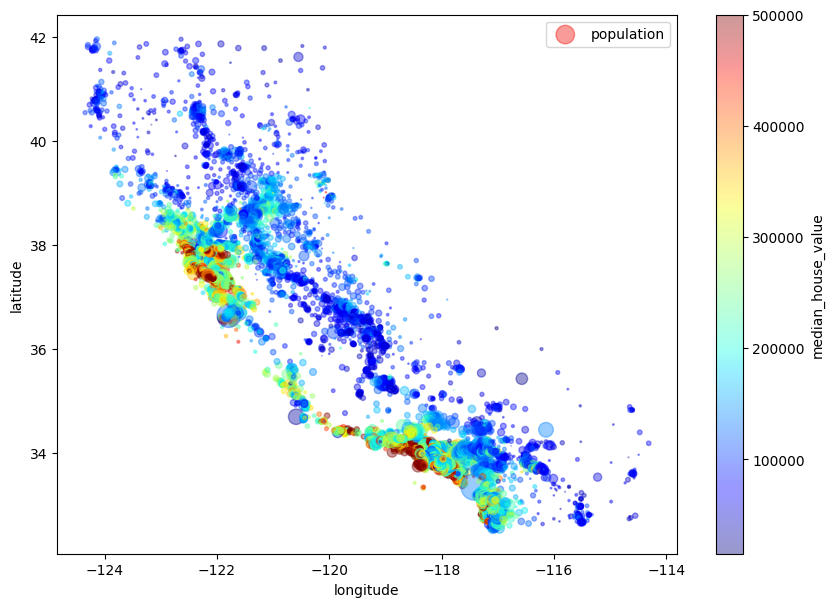

In [34]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.4,
    s=housing['population']/100,
    label='population',
    figsize=(10,7),
    c='median_house_value',
    cmap=plt.get_cmap('jet'),
    colorbar=True
)


*   # Radius of the circle indicates the population size of the district.

*   # Colour represents the how expensive or median house price in that district.



*   as we can see near to ocean are in more yellow ,green ,orange in colour .
    which says that close to ocean that much expensive they are.

*   If we observe same populated city with same radius but farther to ocean is less expensive compared to circle (district) which is close to the ocean.

# So ,we can conclude closeness to the ocean can be more useful to predict the house price or target.

. but Already we have ocean proximity right which conveys that info ,but that info is not enough becuase if we observe northern califlornia .

. The house prices are low even they are close to the ocean.

. so ,clustring each similar region and finding the distance from the cluster centroid

. helps us to find which cluster they belongs

. also not just like ocean proximity it doesn't just say close to ocean but rather say how close to the ocean.

## But we are not going to implement that just for understanding that we can perform feature engineering we are learning.
